In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import plotly
from skimage import io
from skimage import morphology as morp
import plotly.express as px
import plotly.graph_objects as go

# Erosion and Dilation and Boundary detetcion

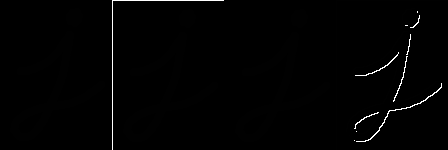

In [4]:
I = cv2.imread('/content/drive/My Drive/Image Processing/j.png')
kernel=np.zeros((3, 3),np.uint8)
I=-I
erosion=cv2.erode(I, kernel, 1)
dilation=cv2.dilate(I, kernel, 1)
boundary=I-erosion
cv2_imshow(np.hstack([I, erosion, dilation, boundary]))

##Morphological Operations

##Kernel
##Adaptive Threshohlding

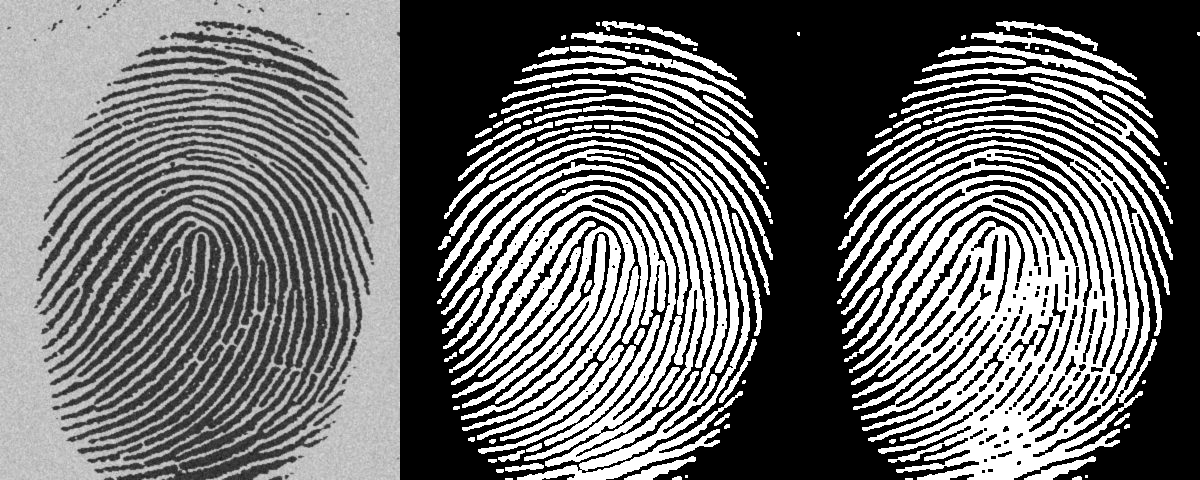

In [5]:
I = cv2.imread('/content/drive/My Drive/Image Processing/FingerPrint.jpg')
ret,binary = cv2.threshold(I, 125, 255, cv2.THRESH_BINARY_INV)
se=morp.square(3, dtype='uint8')
opening=cv2.morphologyEx(binary, cv2.MORPH_OPEN, se)
closing=cv2.morphologyEx(opening, cv2.MORPH_CLOSE, se)
closing2=closing/255
cv2_imshow(np.hstack([I, opening, closing]))

#Boundary

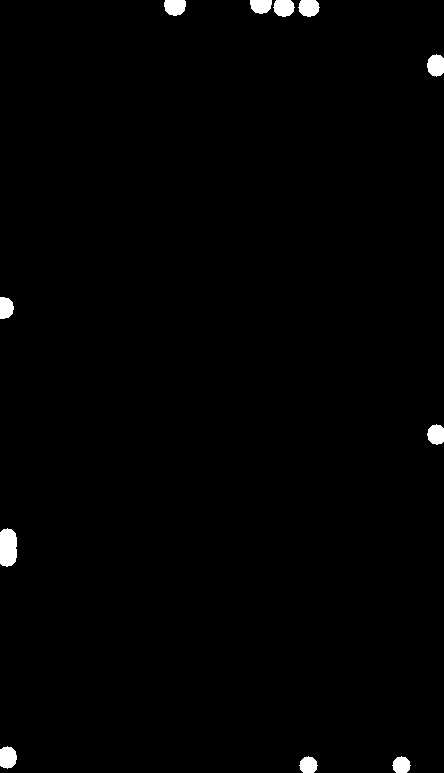

In [6]:
I = cv2.imread('/content/drive/My Drive/Image Processing/coins.jpg')
ret,I = cv2.threshold(I, 50, 255, cv2.THRESH_BINARY)

# cv2_imshow(I)
fig = go.Figure()
fig.add_trace(go.Histogram(x=I.ravel(), name= 'Original Image'))
se=morp.disk(9, dtype='uint8')
se

I=cv2.erode(I, se, 1)

for i in range(8, I.shape[0]-8):
  for j in range(8, I.shape[1]-8):
    I[i][j]=0

I=cv2.dilate(I, se, 1)

cv2_imshow(I)


#Overlapping

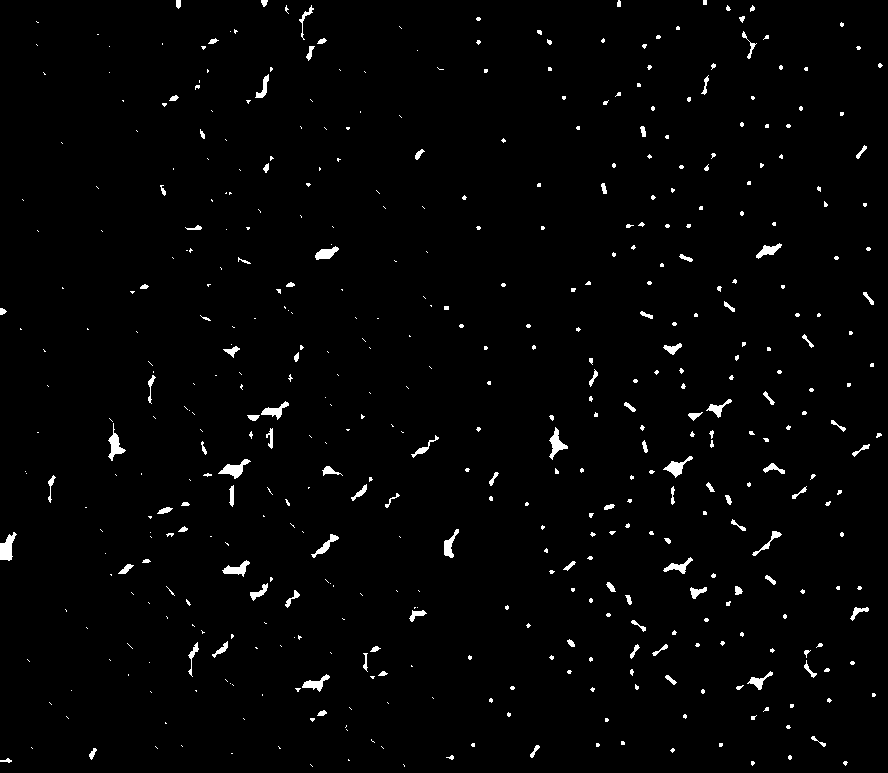

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0

In [49]:
I = cv2.imread('/content/drive/My Drive/Image Processing/coins.jpg', cv2.IMREAD_GRAYSCALE)
ret,I = cv2.threshold(I, 50, 255, cv2.THRESH_BINARY)


se1=morp.disk(9, dtype='uint8')

se=np.zeros((30,30), dtype=int)
for i in range(30):
  for j in range(30):
    if i<1 or j<1 or i>=23 or j>=23:
      se[i][j]=0
    elif i<4 or j<4 or i>=20 or j>=20:
      se[i][j]=0
    else:
      se[i][j]=se1[i-7][j-7]
      # se[i][j]=-1
c=4
# se=np.zeros((c,c), dtype=int)

hm=cv2.morphologyEx(I, cv2.MORPH_HITMISS, se)
hm1=cv2.morphologyEx(I, cv2.MORPH_ERODE, se1)
# I=cv2.erode(I, se, 1)
# I1=I.copy()

# cv2_imshow(I)
# c=9
# for i in range(19, I.shape[0]-19):
#   for j in range(19, I.shape[1]-19):
#     if I[i][j]==255:
#       for x in range(i-c, i+c):
#         for y in range(j-c, j+c):
#           if x!=i or y!=j:
#             I1[x][y]=0
#     # print(I[i][j])
# I1=cv2.dilate(I1, se, 1)
# # I=cv2.dilate(I, se, 1)

cv2_imshow(np.hstack([hm, hm1]))

print(se)
import sys

np.set_printoptions(threshold=sys.maxsize)

# print(I)


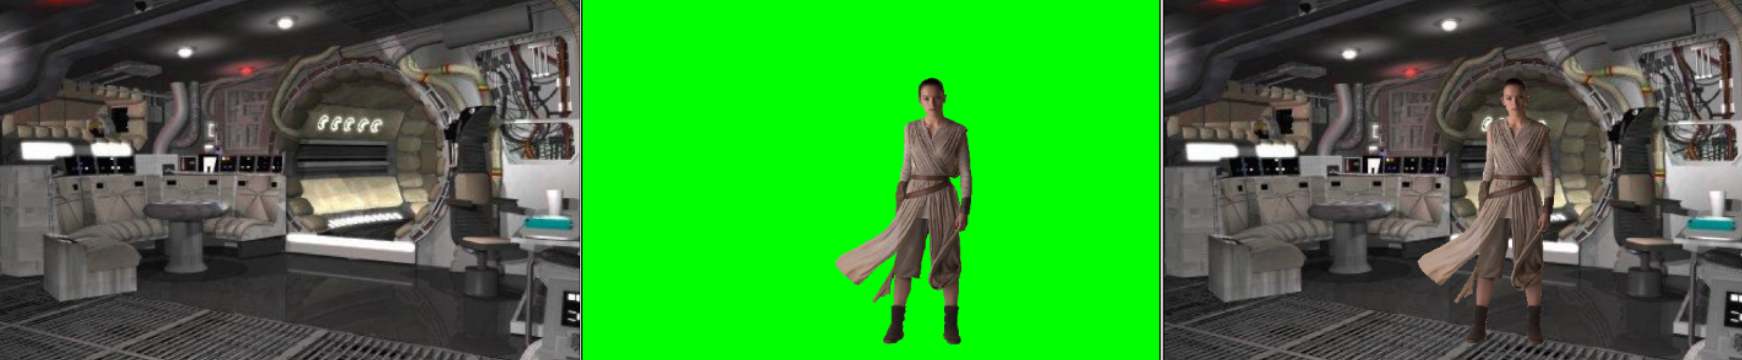

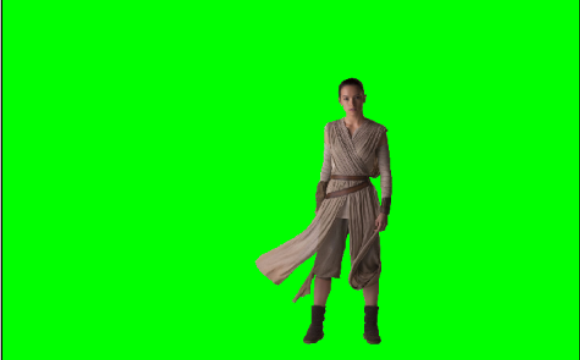

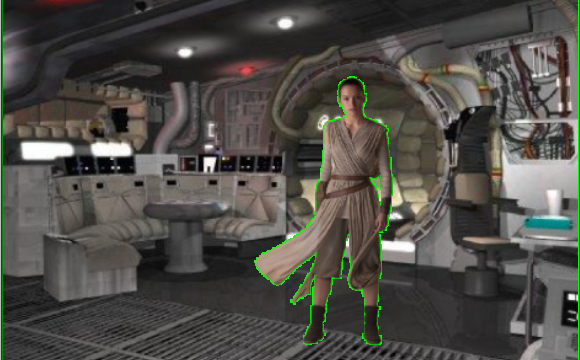

In [7]:
I = cv2.imread('/content/drive/My Drive/Image Processing/chroma_keying_demo.png')
cv2_imshow(I)
I1=I[:,int(I.shape[1]/3):2*int(I.shape[1]/3)]
I2=I[:,int(0):int(I.shape[1]/3)]
cv2_imshow(I1)
# I1[:,:,[2,0]]=I1[:,:,[0,2]]
for i in range(I1.shape[0]):
  for j in range(I1.shape[1]):
    if I1[i][j][0]==0 and I1[i][j][1]==255 and I1[i][j][2]==0  :
      I1[i][j]=I2[i][j]
    # print(I1[i][i])
cv2_imshow(I1)


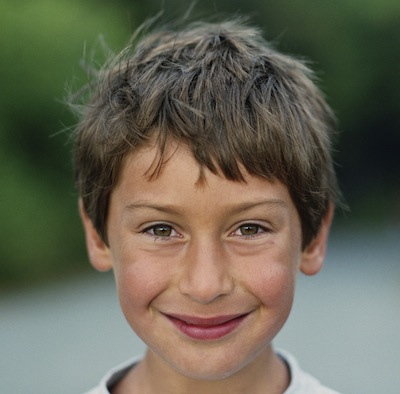

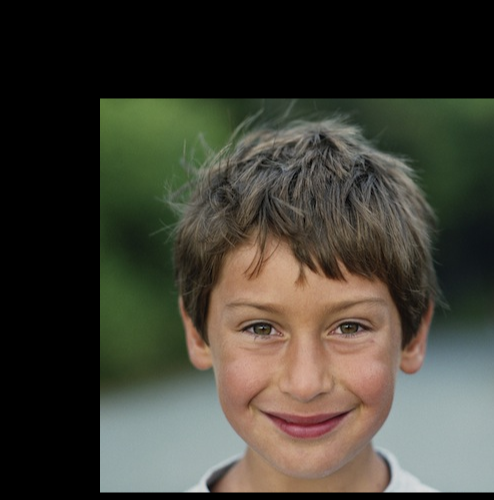

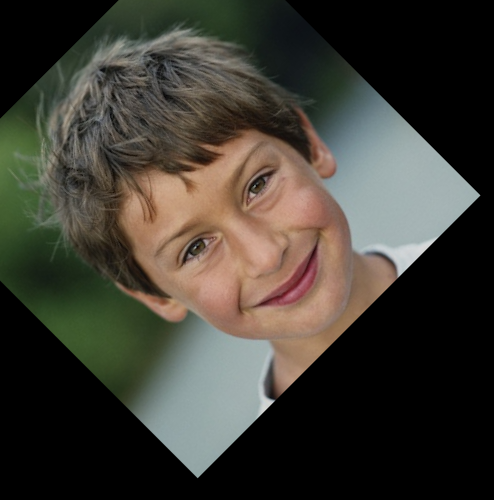

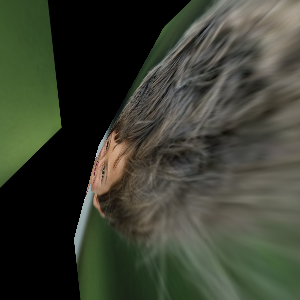

In [8]:
I = cv2.imread('/content/drive/My Drive/Image Processing/boy_smiling.jpg')
cv2_imshow(I)
height, width, x= I.shape
T=np.float32([[1, 0, I.shape[1]/4], [0, 1, I.shape[0]/4]])
img=cv2.warpAffine(I, T, (I.shape[0]+100, I.shape[1]+100))
cv2_imshow(img)
M1=cv2.getRotationMatrix2D((width/2, height/2), 45, 1)
imrot=cv2.warpAffine(I, M1, (I.shape[0]+100, I.shape[1]+100))
cv2_imshow(imrot)
pt1=np.float32([[50,50], [200, 50], [50, 200], [100, 100]])
pt2=np.float32([[10,100], [200, 50], [100, 250], [200, 200]])
M=cv2.getPerspectiveTransform(pt1, pt2)
im=cv2.warpPerspective(I, M, (300, 300))
cv2_imshow(im)

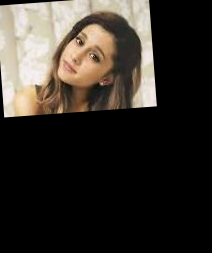

In [9]:
import math
I = cv2.imread('/content/drive/My Drive/Copy of tilted_face.jpg')
height, width, x= I.shape
x1=341
y1=325
x2=423
y2=331
tan=(y2-y1)/(x2-x1)
M1=cv2.getRotationMatrix2D((width/2, height/2), math.degrees(math.atan(tan)), 1)
imrot=cv2.warpAffine(I, M1, (I.shape[0]+100, I.shape[1]+100))
cv2_imshow(imrot)




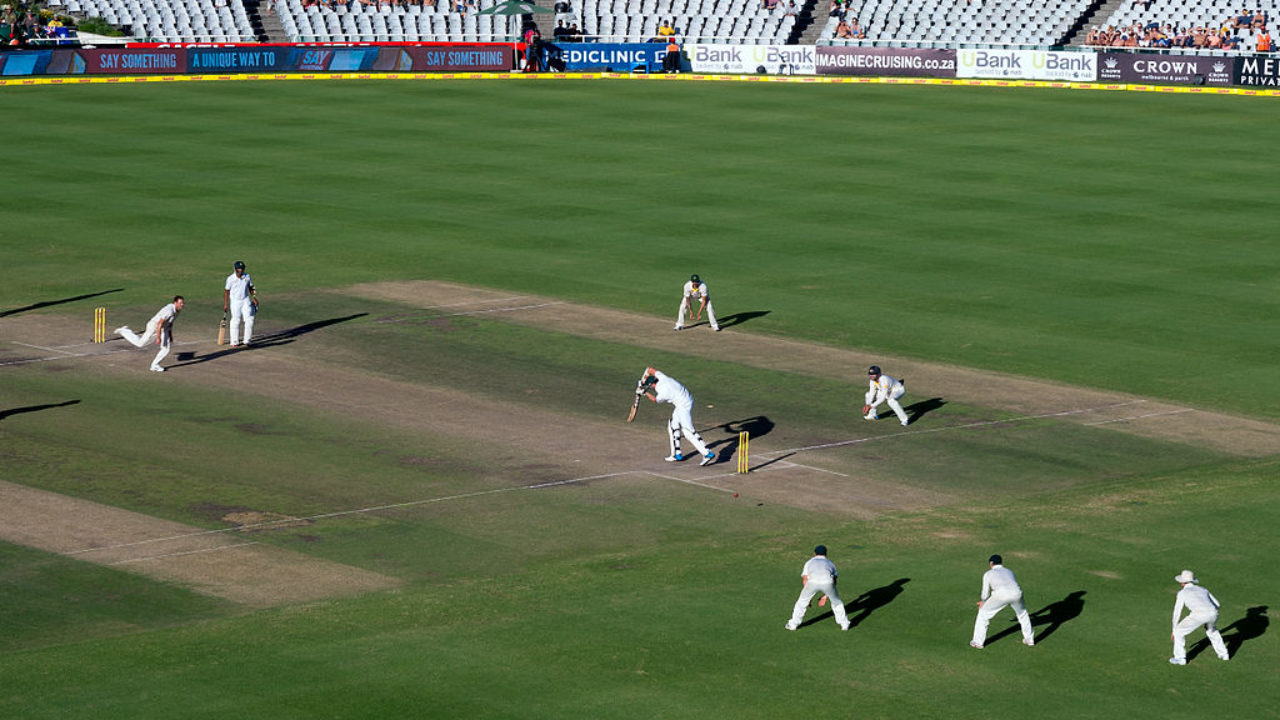

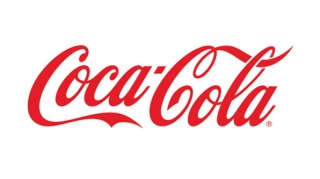

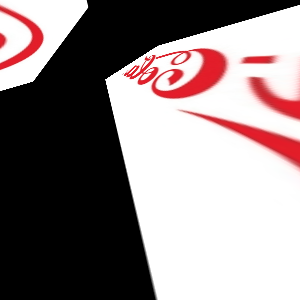

In [10]:
I1 = cv2.imread('/content/drive/My Drive/Image Processing/stadium.jpg')
I2 = cv2.imread('/content/drive/My Drive/Image Processing/coca.jpg')
# I3 = cv2.add(I1, I2)
cv2_imshow(I1)
cv2_imshow(I2)
# cv2_imshow(I3)
pts1 = np.float32([[0,0],[0,179],[320, 0],[320,179]]) # cola coords 
pts2 = np.float32([[600,120],[600, 220],[1000, 170],[1000, 270]]) # stadium tile coords
M, st=cv2.findHomography(pt2, pt1)
im=cv2.warpPerspective(I2, M, (300, 300))
cv2_imshow(im)